In [10]:
from bettools import (
    get_data,
    generate_seasons,
    calculate_poisson_match_outcomes,
    calculate_ev_from_odds,
    find_best_fit_goals,
)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.options.mode.chained_assignment = None

leagues = ["E0", "E1", "E2", "E3"]

season_list = generate_seasons(2016, 2024)

df_ls = get_data(season_list, leagues, additional_cols=["HS", "AS", "HC", "AC"])

In [62]:
main_df = pd.concat(df_ls)

home_games = main_df[["Date", "HomeTeam", "FTHG", "HS", "HC"]].rename(
    columns={"HomeTeam": "Team", "FTHG": "Goals", "HS": "Shots", "HC": "Corners"}
)

away_games = main_df[["Date", "AwayTeam", "FTAG", "AS", "AC"]].rename(
    columns={"AwayTeam": "Team", "FTAG": "Goals", "AS": "Shots", "AC": "Corners"}
)

all_games = pd.concat([home_games, away_games], ignore_index=True)

all_games.sort_values(["Team", "Date"], inplace=True)

all_games["RollingMeanGoals"] = all_games.groupby("Team")["Goals"].transform(
    lambda x: x.shift().rolling(window=10).mean()
)
all_games["RollingMeanShots"] = all_games.groupby("Team")["Shots"].transform(
    lambda x: x.shift().rolling(window=10).mean()
)
all_games["RollingMeanCorners"] = all_games.groupby("Team")["Corners"].transform(
    lambda x: x.shift().rolling(window=25).mean()
)

all_games.dropna(inplace=True)
all_games.reset_index(inplace=True, drop=True)

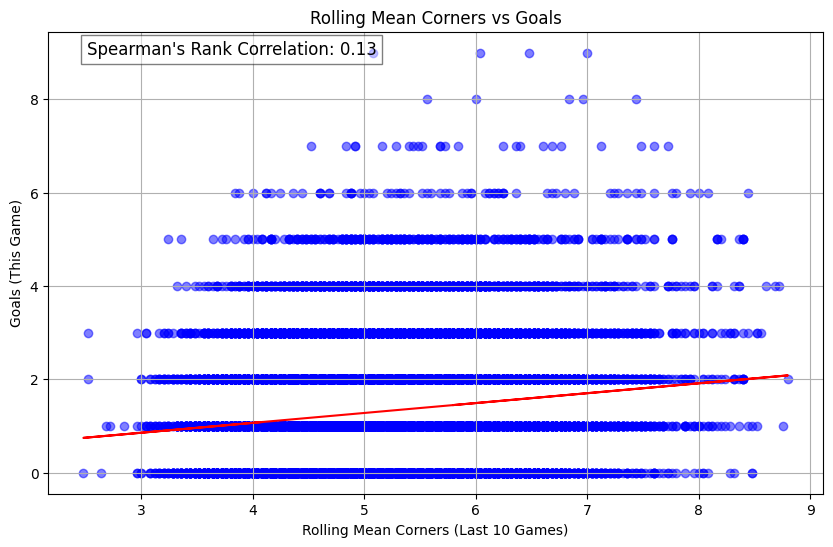

In [63]:
# Calculate the Pearson correlation coefficient between the rolling mean corners and goals
correlation = all_games["RollingMeanCorners"].corr(
    all_games["Goals"], method="spearman"
)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    all_games["RollingMeanCorners"], all_games["Goals"], color="blue", alpha=0.5
)

# Calculate coefficients for the best fit line using numpy's polyfit
m, b = np.polyfit(all_games["RollingMeanCorners"], all_games["Goals"], 1)

# Add the best fit line to the plot in red
plt.plot(
    all_games["RollingMeanCorners"],
    m * all_games["RollingMeanCorners"] + b,
    color="red",
)

# Add the correlation coefficient to the plot
plt.text(
    0.05,
    0.95,
    f"Spearman's Rank Correlation: {correlation:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)

plt.title("Rolling Mean Corners vs Goals")
plt.xlabel("Rolling Mean Corners (Last 25 Games)")
plt.ylabel("Goals (This Game)")
plt.grid(True)
plt.show()

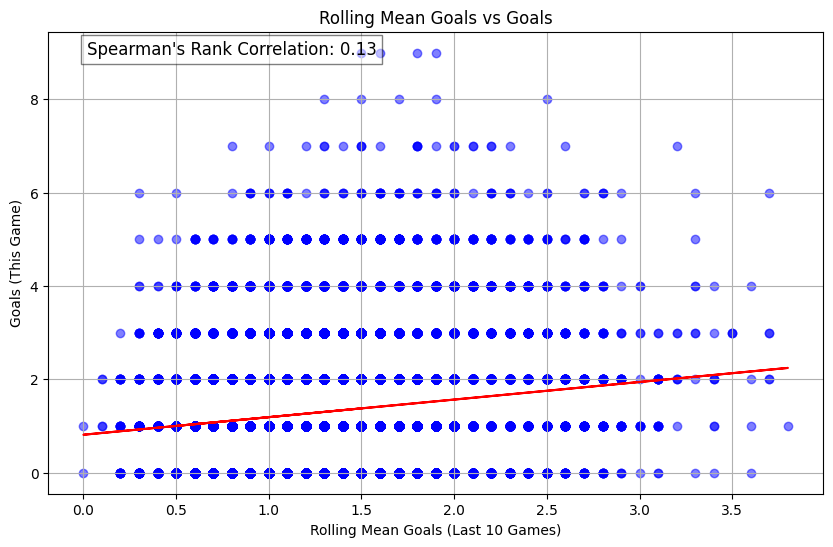

In [48]:
# Calculate the Pearson correlation coefficient between the rolling mean corners and goals
correlation = all_games["RollingMeanGoals"].corr(all_games["Goals"], method="spearman")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(all_games["RollingMeanGoals"], all_games["Goals"], color="blue", alpha=0.5)

# Calculate coefficients for the best fit line using numpy's polyfit
m, b = np.polyfit(all_games["RollingMeanGoals"], all_games["Goals"], 1)

# Add the best fit line to the plot in red
plt.plot(
    all_games["RollingMeanGoals"], m * all_games["RollingMeanGoals"] + b, color="red"
)

# Add the correlation coefficient to the plot
plt.text(
    0.05,
    0.95,
    f"Spearman's Rank Correlation: {correlation:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)

plt.title("Rolling Mean Goals vs Goals")
plt.xlabel("Rolling Mean Goals (Last 10 Games)")
plt.ylabel("Goals (This Game)")
plt.grid(True)
plt.show()

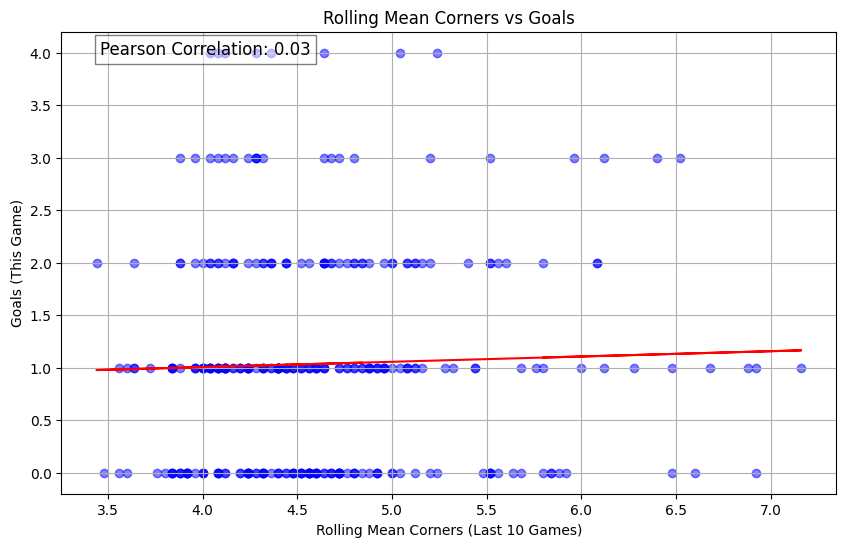

In [46]:
# Calculate the Pearson correlation coefficient between the rolling mean corners and goals
bradford_df = all_games[all_games["Team"] == ""]

correlation = bradford_df["RollingMeanCorners"].corr(bradford_df["Goals"])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    bradford_df["RollingMeanCorners"], bradford_df["Goals"], color="blue", alpha=0.5
)

# Calculate coefficients for the best fit line using numpy's polyfit
m, b = np.polyfit(bradford_df["RollingMeanCorners"], bradford_df["Goals"], 1)

# Add the best fit line to the plot in red
plt.plot(
    bradford_df["RollingMeanCorners"],
    m * bradford_df["RollingMeanCorners"] + b,
    color="red",
)

# Add the correlation coefficient to the plot
plt.text(
    0.05,
    0.95,
    f"Pearson Correlation: {correlation:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)

plt.title("Rolling Mean Corners vs Goals")
plt.xlabel("Rolling Mean Corners (Last 10 Games)")
plt.ylabel("Goals (This Game)")
plt.grid(True)
plt.show()